In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap

In [8]:
def k_error_freq(mu, s, k):
    return(math.factorial(k) * (mu/s)**k)

def prob_nonevent(poisson_freq):
    return(1-np.exp(-poisson_freq))

In [15]:
num_mutations = []
pop_sizes = []
prob_exists = []
var_sizes = []
mut_rates = []
fitness_costs = []

for k in range(1,6):
    for N in 5e6 * np.power(2, np.arange(8)):
        for mut_rate in [1*10**-float(x) for x in np.arange(3,7)]:
            for fitness_cost in 0.01*np.arange(1,11):
                freq_variants = k_error_freq(mut_rate, fitness_cost, k)
                var_sizes.append(freq_variants*N)
                prob_exists.append(prob_nonevent(freq_variants*N))
                pop_sizes.append(N)
                num_mutations.append(k)
                mut_rates.append(mut_rate)
                fitness_costs.append(fitness_cost)

sweep_df = pd.DataFrame({"s":fitness_costs, "k":num_mutations, "N":pop_sizes, "mu":mut_rates, "prob":prob_exists, "size":var_sizes})

## Preexisting genetic variation

All theory comes from [The frequency of resistant mutant virus before antiviral therapy. Ribeiro RM, Bonhoeffer S, and Nowak MA. AIDS (1998)](https://journals.lww.com/aidsonline/Fulltext/1998/05000/The_frequency_of_resistant_mutant_virus_before.6.aspx). If not otherwise specified, parameter values are:

$\mu = 10^{-4}$

$\delta = 0.05$

### Existence of mutants with multiple deleterious mutations

In the plots below, each curve is a different total population size, ranging from 5 million to 640 million infections.

In [3]:
N_color = LinearSegmentedColormap.from_list(colors=["purple", "cyan"], name="N")

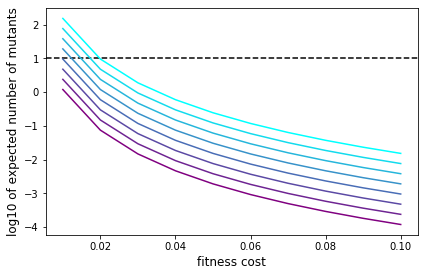

In [41]:
#Figure 3- sweep across fitness cost

#SINGLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 1]
plot_hold = plot_hold[plot_hold["mu"] == 1e-4]

plt.figure()
plt.axhline(np.log10(10), ls="--", color="black")

for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(to_plot["s"], np.log10(to_plot["size"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("fitness cost", fontsize=12)
plt.ylabel("log10 of expected number of mutants", fontsize=12)
#plt.xticks(range(1,6), fontsize=12)
plt.tight_layout()
#plt.savefig()
plt.show()

#DOUBLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 2]
plot_hold = plot_hold[plot_hold["mu"] == 1e-4]

plt.figure()
plt.axhline(np.log10(10), ls="--", color="black")

for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(to_plot["s"], np.log10(to_plot["size"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("fitness cost", fontsize=12)
plt.ylabel("log10 of expected number of mutants", fontsize=12)
#plt.xticks(range(1,6), fontsize=12)
plt.tight_layout()
#plt.savefig()
plt.show()

#TRIPLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 3]
plot_hold = plot_hold[plot_hold["mu"] == 1e-4]

plt.figure()
plt.axhline(np.log10(10), ls="--", color="black")

for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(to_plot["s"], np.log10(to_plot["size"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("fitness cost", fontsize=12)
plt.ylabel("log10 of expected number of mutants", fontsize=12)
#plt.xticks(range(1,6), fontsize=12)
plt.tight_layout()
#plt.savefig()
plt.show()

#QUADRUPLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 4]
plot_hold = plot_hold[plot_hold["mu"] == 1e-4]

plt.figure()
plt.axhline(np.log10(10), ls="--", color="black")

for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(to_plot["s"], np.log10(to_plot["size"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("fitness cost", fontsize=12)
plt.ylabel("log10 of expected number of mutants", fontsize=12)
#plt.xticks(range(1,6), fontsize=12)
plt.tight_layout()
#plt.savefig()
plt.show()

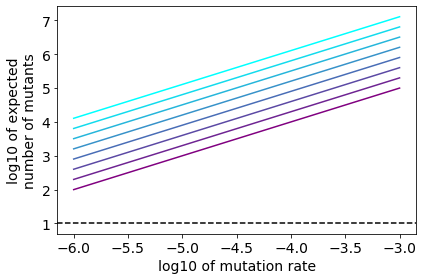

In [19]:
#Figure 5A-D

#SINGLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 1]
plot_hold = plot_hold[plot_hold["s"] == 0.05]

plt.figure()
plt.axhline(np.log10(10), ls="--", color="black")

for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(np.log10(to_plot["mu"]), np.log10(to_plot["size"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("log10 of mutation rate", fontsize=14)
plt.ylabel("log10 of expected\nnumber of mutants", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

#DOUBLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 2]
plot_hold = plot_hold[plot_hold["s"] == 0.05]

plt.figure()
plt.axhline(np.log10(10), ls="--", color="black")

for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(np.log10(to_plot["mu"]), np.log10(to_plot["size"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("log10 of mutation rate", fontsize=14)
plt.ylabel("log10 of expected\nnumber of mutants", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

#TRIPLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 3]
plot_hold = plot_hold[plot_hold["s"] == 0.05]

plt.figure()
plt.axhline(np.log10(10), ls="--", color="black")

for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(np.log10(to_plot["mu"]), np.log10(to_plot["size"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("log10 of mutation rate", fontsize=14)
plt.ylabel("log10 of expected\nnumber of mutants", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

#QUADRUPLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 4]
plot_hold = plot_hold[plot_hold["s"] == 0.05]

plt.figure()
plt.axhline(np.log10(10), ls="--", color="black")

for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(np.log10(to_plot["mu"]), np.log10(to_plot["size"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("log10 of mutation rate", fontsize=14)
plt.ylabel("log10 of expected\nnumber of mutants", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

## Valley crossing- time to escape

In [6]:
def p_k(k, K, s, N, delta, mu):
    if k == K:
        num = 1 - np.exp(-s)
        denom = 1 - np.exp(-N*s)
        return(num/denom)
    else:
        to_return = -delta + np.sqrt(delta**2 + 4*mu*p_k(k+1, K, s, N, delta, mu))
        return(to_return/2)
    
def tau_k(k, K, s, N, delta, mu):
    denom = np.sqrt(delta**2 + 4 * mu * p_k(k+1, K, s, N, delta, mu))
    num = np.log(2/(1+delta/denom)) * 2
    return(num/(denom-delta))
    
def tau_small(K, s, N, delta, mu):
    to_return = 1/(N*mu*p_k(1, K, s, N, delta, mu)) + np.euler_gamma/s
    for k in range(1, K):
        to_return += tau_k(k, K, s, N, delta, mu)
    return(to_return)

def tau(K, s, N, delta, mu):
    if K == 1:
        return(1/(N*mu*s))
        
    elif N * mu < 1:
        return(tau_small(K, s, N, delta, mu))
    else:
        k = 1
        new_N = N*k_error_freq(mu, delta, k)
        while new_N * mu > 1 and K-k > 1:
            k += 1
            new_N = N*k_error_freq(mu, delta, k)
        return(tau(K-k, s, new_N, delta, mu))

In [9]:
taus = []
Ns = []
Ks = []
mus = []
svals = []
deltas = []
for N in 5e6 * np.power(2, np.arange(8)):
    for K in range(1, 7):
        for mu in [1*10**-float(x) for x in np.arange(3,7)]:
            for s in np.arange(1, 30)*0.05:
                for delta in np.arange(1, 10)*0.01:
                    taus.append(tau(K, s, N, delta, mu))
                    Ks.append(K)
                    Ns.append(N)
                    mus.append(mu)
                    svals.append(s)
                    deltas.append(delta)
        
sweep_df = pd.DataFrame({"k":Ks, "N":Ns, "mu":mus, "tau":taus, "s":svals, "delta":deltas})

/Users/dve/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/Users/dve/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


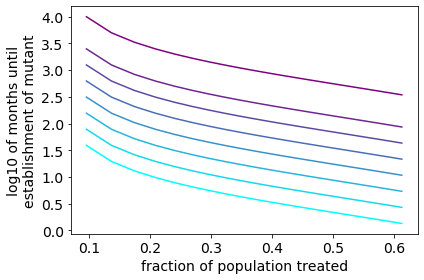

In [6]:
#Figure 4

N_color = LinearSegmentedColormap.from_list(colors=["purple", "cyan"], name="N")

delta = 0.05

#SINGLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 1]
plot_hold = plot_hold[plot_hold["mu"] == 1e-4]
plot_hold = plot_hold[plot_hold["delta"] == delta]
minN = np.amin(list(set(np.log10(plot_hold["N"]))))
maxN = np.amax(list(set(np.log10(plot_hold["N"])))) - minN


plt.figure()
for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(1-(1-delta)/(1+to_plot["s"]), np.log10(to_plot["tau"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("fraction of population treated", fontsize=14)
plt.ylabel("log10 of months until\nestablishment of mutant", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

#DOUBLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 2]
plot_hold = plot_hold[plot_hold["mu"] == 1e-4]
plot_hold = plot_hold[plot_hold["delta"] == delta]
minN = np.amin(list(set(np.log10(plot_hold["N"]))))
maxN = np.amax(list(set(np.log10(plot_hold["N"])))) - minN


plt.figure()
for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(1-(1-delta)/(1+to_plot["s"]), np.log10(to_plot["tau"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("fraction of population treated", fontsize=14)
plt.ylabel("log10 of months until\nestablishment of mutant", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

#TRIPLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 3]
plot_hold = plot_hold[plot_hold["mu"] == 1e-4]
plot_hold = plot_hold[plot_hold["delta"] == delta]
minN = np.amin(list(set(np.log10(plot_hold["N"]))))
maxN = np.amax(list(set(np.log10(plot_hold["N"])))) - minN


plt.figure()
for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(1-(1-delta)/(1+to_plot["s"]), np.log10(to_plot["tau"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("fraction of population treated", fontsize=14)
plt.ylabel("log10 of months until\nestablishment of mutant", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

#QUARDUPLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 4]
plot_hold = plot_hold[plot_hold["mu"] == 1e-4]
plot_hold = plot_hold[plot_hold["delta"] == delta]
minN = np.amin(list(set(np.log10(plot_hold["N"]))))
maxN = np.amax(list(set(np.log10(plot_hold["N"])))) - minN


plt.figure()
for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(1-(1-delta)/(1+to_plot["s"]), np.log10(to_plot["tau"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("fraction of population treated", fontsize=14)
plt.ylabel("log10 of months until\nestablishment of mutant", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

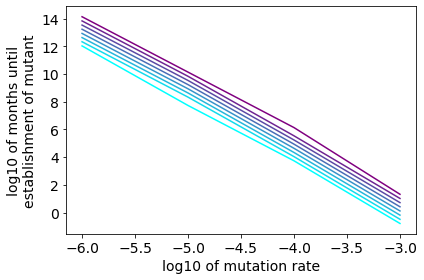

In [13]:
#Figure 5E-H

#SINGLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 1]
plot_hold = plot_hold[plot_hold["s"] == 0.2]
plot_hold = plot_hold[plot_hold["delta"] == 0.05]
minN = np.amin(list(set(np.log10(plot_hold["N"]))))
maxN = np.amax(list(set(np.log10(plot_hold["N"])))) - minN


plt.figure()
for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(np.log10(to_plot["mu"]), np.log10(to_plot["tau"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("log10 of mutation rate", fontsize=14)
plt.ylabel("log10 of months until\nestablishment of mutant", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

#DOUBLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 2]
plot_hold = plot_hold[plot_hold["s"] == 0.2]
plot_hold = plot_hold[plot_hold["delta"] == 0.05]
minN = np.amin(list(set(np.log10(plot_hold["N"]))))
maxN = np.amax(list(set(np.log10(plot_hold["N"])))) - minN


plt.figure()
for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(np.log10(to_plot["mu"]), np.log10(to_plot["tau"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("log10 of mutation rate", fontsize=14)
plt.ylabel("log10 of months until\nestablishment of mutant", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

#TRIPLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 3]
plot_hold = plot_hold[plot_hold["s"] == 0.2]
plot_hold = plot_hold[plot_hold["delta"] == 0.05]
minN = np.amin(list(set(np.log10(plot_hold["N"]))))
maxN = np.amax(list(set(np.log10(plot_hold["N"])))) - minN


plt.figure()
for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(np.log10(to_plot["mu"]), np.log10(to_plot["tau"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("log10 of mutation rate", fontsize=14)
plt.ylabel("log10 of months until\nestablishment of mutant", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

#QUADRUPLE MUTANTS
plot_hold = sweep_df[sweep_df["k"] == 4]
plot_hold = plot_hold[plot_hold["s"] == 0.2]
plot_hold = plot_hold[plot_hold["delta"] == 0.05]
minN = np.amin(list(set(np.log10(plot_hold["N"]))))
maxN = np.amax(list(set(np.log10(plot_hold["N"])))) - minN


plt.figure()
for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(np.log10(to_plot["mu"]), np.log10(to_plot["tau"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("log10 of mutation rate", fontsize=14)
plt.ylabel("log10 of months until\nestablishment of mutant", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig()
plt.show()

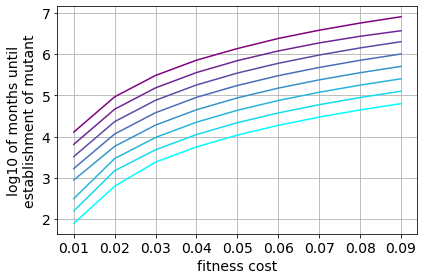

In [83]:
#Figure S3

plot_hold = sweep_df[sweep_df["k"] == 4]
plot_hold = plot_hold[plot_hold["s"] == 0.2]
plot_hold = plot_hold[plot_hold["mu"] == 1e-4]
minN = np.amin(list(set(np.log10(plot_hold["N"]))))
maxN = np.amax(list(set(np.log10(plot_hold["N"])))) - minN


plt.figure()
for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(to_plot["delta"], np.log10(to_plot["tau"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("fitness cost", fontsize=14)
plt.ylabel("log10 of months until\nestablishment of mutant", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.tight_layout()
#plt.savefig()
plt.show()

plot_hold = sweep_df[sweep_df["k"] == 4]
plot_hold = plot_hold[plot_hold["s"] == 0.2]
plot_hold = plot_hold[plot_hold["mu"] == 1e-4]
minN = np.amin(list(set(np.log10(plot_hold["N"]))))
maxN = np.amax(list(set(np.log10(plot_hold["N"])))) - minN


plt.figure()
for N in set(plot_hold["N"]):
    to_plot = plot_hold[plot_hold["N"] == N]
    plt.plot(to_plot["delta"], np.log10(to_plot["tau"]), color=N_color((np.log10(N)-minN)/maxN))

plt.xlabel("fitness cost", fontsize=14)
plt.ylabel("log10 of months until\nestablishment of mutant", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.tight_layout()
#plt.savefig()
plt.show()

## Figure S1

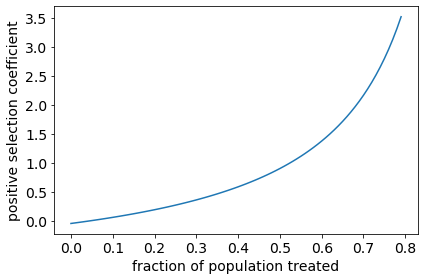

In [14]:
f_sweep = np.arange(0, 80)*0.01
ws = (1/(1-f_sweep)) * (1-0.05) -1
plt.figure()
plt.plot(f_sweep,ws)
plt.xlabel("fraction of population treated", fontsize=14)
plt.ylabel("positive selection coefficient", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0,2)
plt.tight_layout()
#plt.savefig()
plt.show()